# Feature Selection

## Highlights

Method used: Feature Importance
- Random Forests
- LightGBM Regressor

**Average KPI Feature Importance in order of predictive power**
- Random Forests
    - CTR: `funnel`, `publisher`
    - CVR(SV): `funnel`, `publisher`, `kpi_audience`
    - CVR(BF): `funnel`, `publisher`
    - CVR(S): `funnel`, `publisher`, `video_type`
- LGBM Regressor:
    - CTR: `publisher`, `kpi_audience`, `theme`, `creative_versions`, `funnel`, `price`, `video_type`, `discount`, `product`
    - CVR(SV): `kpi_audience`, `publisher`, `creative_version`, `discount`, `video_type`, `theme`, `funnel`, `price_placement`, `price`, `lob`, `length`
    - CVR(BF): `publisher`, `kpi_audience`, `creative_versions`, `theme`, `discount`, `price`, `video_type`, `funnel`, `price_placement`, `lob`, `product`
    - CVR(S): `publisher`, `kpi_audience`, `theme`, `price`, `creative_versions`, `discount`, `funnel`, `video_type`, `price_placement`, `lob`, `product`, `length`

**Weekly KPIs Feature Importance in order of predictive power**
- Random Forests
    - CTR: `funnel`, `publisher`, `kpi_audience`, `creative_versions`, `discount`, `lob`, `video_type`
    - CVR(SV): `funnel`, `publisher`, `kpi_audience`, `lob`, `creative_versions`, `discount`, `video_type`
    - CVR(BF): `funnel`, `publisher`, `lob`, `creative_versions`, `discount`, `video_type`, `kpi_audience`, `product`, `price_placement`, `length`, `price`
    - CVR(S): `funnel`, `lob`, `creative_versions`, `publisher`, `kpi_audience`, `discount`, `video_type`, `price_placement`, `price`, `product`, `length`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = None

In [2]:
dummy_data = pd.read_csv('C:/Users/saulc/OneDrive - University of Calgary/Classes/Econ 599 - OneDrive/ML_data/dummy_ml.csv')
labeled_data = pd.read_csv('C:/Users/saulc/OneDrive - University of Calgary/Classes/Econ 599 - OneDrive/ML_data/labeled_ml.csv')

dummy_data.drop(columns='Creative ID', inplace=True)
labeled_data.drop(columns='Creative ID', inplace=True)

## Feature Selection on Average KPIs

In [3]:
X = labeled_data.iloc[:, :14]
y = labeled_data.iloc[:, 14:29]
X['price_applied'] = X['price'].apply(lambda x: 1 if x > 0 else 0)

In [4]:
X.head()

,funnel,publisher,lob,product,theme,kpi_audience,creative_versions,price,price_placement,discount,offer_placement,video_type,length,discount_applied,price_applied
0,1,0,0,1,0,0,0,0,5,0.00,7,4,4,0,0
1,1,11,0,1,0,8,0,0,5,0.00,7,4,4,0,0
2,1,12,0,1,0,8,0,0,5,0.00,7,4,4,0,0
3,1,13,0,1,0,8,0,0,5,0.00,7,4,4,0,0
4,0,13,0,2,0,8,6,1,5,0.00,7,4,4,0,1


In [5]:
y.head()

,Mean_Spend,total_spend,total_Impressions,Mean_CTR,Mean_CVRS,Mean_CVRBF,Mean_CVRSV,Peak_CTR,Peak_CVRS,Peak_CVRBF,Peak_CVRSV,Med_CTR,Med_CVRS,Med_CVRBF,Med_CVRSV
0,318.77,4144.00,204729.00,0.54,0.00,0.00,0.00,1.71,0.00,0.00,0.00,1.71,0.00,0.00,0.00
1,2953.33,26580.00,959822.00,0.29,0.25,25.07,0.12,0.49,1.49,37.77,0.27,0.49,1.49,37.77,0.27
2,447.22,4025.00,347103.00,0.56,0.22,27.13,0.07,0.66,1.01,73.04,0.10,0.66,1.01,73.04,0.10
3,94.44,850.00,54090.00,0.26,0.00,12.35,0.10,0.37,0.00,37.37,0.22,0.37,0.00,37.37,0.22
4,1.00,1.00,119.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Random Forest Regressor

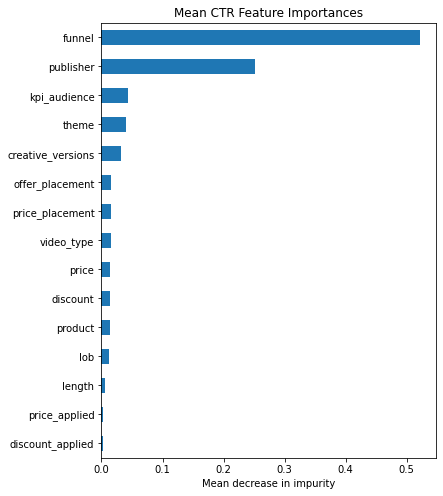

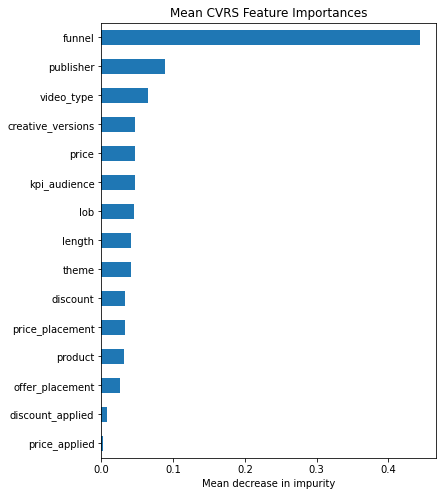

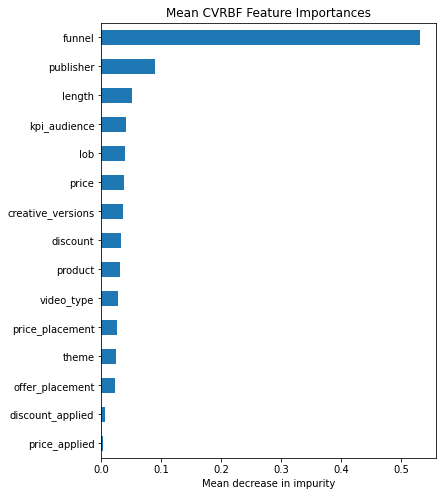

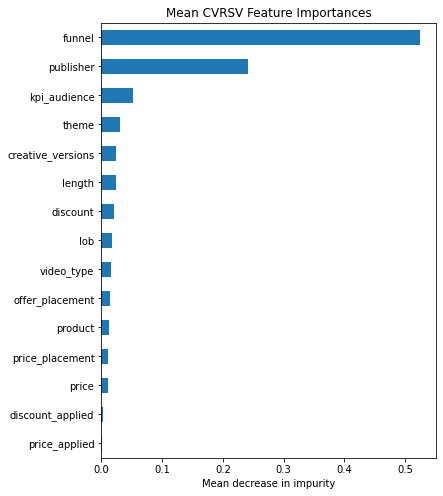

In [6]:
mean_kpis = [col for col in y.columns if col.startswith('Mean')][1:]

for mean_kpi in mean_kpis:
    rf = RandomForestRegressor(random_state=123)
    rf.fit(X, y[mean_kpi])

    importances = pd.Series(
        rf.feature_importances_,
        index=X.columns
    )

    importances = importances.sort_values()

    plt.figure(figsize=(6, 8))
    importances.plot(kind='barh')
    plt.title(f'{mean_kpi.replace("_", " ")} Feature Importances')
    plt.xlabel('Mean decrease in impurity')
    plt.show()

### LGBM Regressor

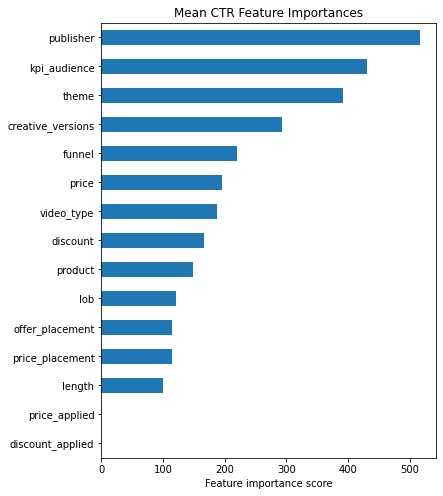

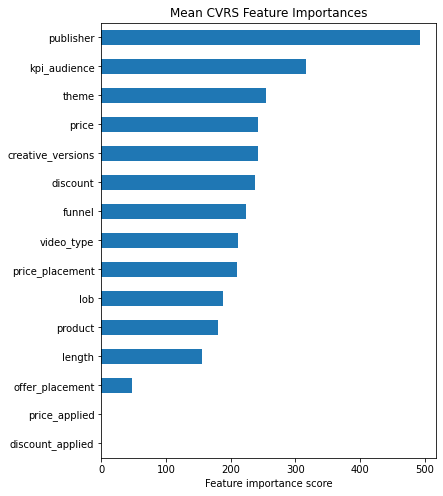

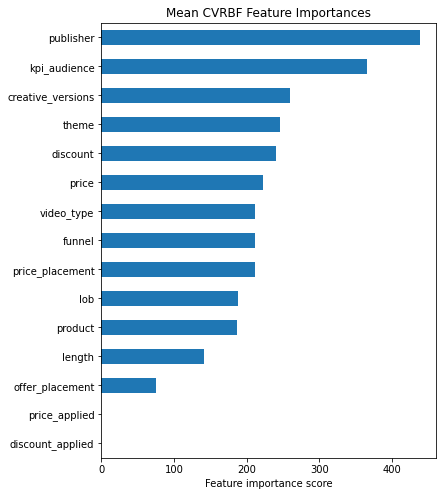

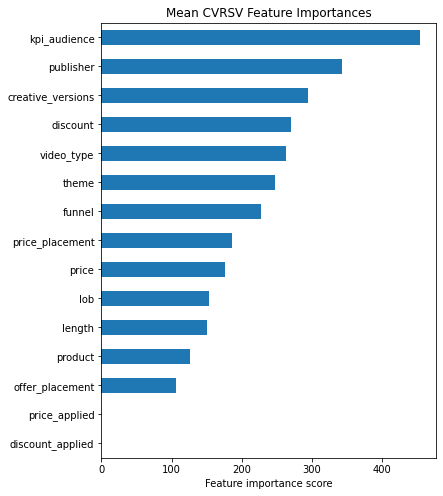

In [7]:
for mean_kpi in mean_kpis:
    lgbr = LGBMRegressor(random_state=123)
    lgbr.fit(X, y[mean_kpi])

    importances = pd.Series(
        lgbr.feature_importances_,
        index=X.columns
    )

    importances = importances.sort_values()

    plt.figure(figsize=(6, 8))
    importances.plot(kind='barh')
    plt.title(f'{mean_kpi.replace("_", " ")} Feature Importances')
    plt.xlabel('Feature importance score')
    plt.show()

## Feature Selection on Week Features

In [8]:
y = labeled_data.iloc[:, 29:]

In [9]:
y.head()

,CTR_W0,CTR_W1,CTR_W2,CTR_W3,CTR_W4,CTR_W5,CTR_W6,CTR_W7,CTR_W8,CTR_W9,CTR_W10,CTR_W11,CTR_W12,CTR_W13,CTR_W14,CTR_W15,CTR_W16,CTR_W17,CTR_W18,CTR_W19,CTR_W20,CTR_W21,CTR_W22,CTR_W23,CTR_W24,CTR_W25,CTR_W26,CTR_W27,CTR_W28,CTR_W29,CTR_W30,CTR_W31,CTR_W32,CTR_W33,CTR_W34,CTR_W35,CTR_W36,CTR_W37,CTR_W38,CTR_W39,CTR_W40,CVR(BF)_W0,CVR(BF)_W1,CVR(BF)_W2,CVR(BF)_W3,CVR(BF)_W4,CVR(BF)_W5,CVR(BF)_W6,CVR(BF)_W7,CVR(BF)_W8,CVR(BF)_W9,CVR(BF)_W10,CVR(BF)_W11,CVR(BF)_W12,CVR(BF)_W13,CVR(BF)_W14,CVR(BF)_W15,CVR(BF)_W16,CVR(BF)_W17,CVR(BF)_W18,CVR(BF)_W19,CVR(BF)_W20,CVR(BF)_W21,CVR(BF)_W22,CVR(BF)_W23,CVR(BF)_W24,CVR(BF)_W25,CVR(BF)_W26,CVR(BF)_W27,CVR(BF)_W28,CVR(BF)_W29,CVR(BF)_W30,CVR(BF)_W31,CVR(BF)_W32,CVR(BF)_W33,CVR(BF)_W34,CVR(BF)_W35,CVR(BF)_W36,CVR(BF)_W37,CVR(BF)_W38,CVR(BF)_W39,CVR(BF)_W40,CVR(SV)_W0,CVR(SV)_W1,CVR(SV)_W2,CVR(SV)_W3,CVR(SV)_W4,CVR(SV)_W5,CVR(SV)_W6,CVR(SV)_W7,CVR(SV)_W8,CVR(SV)_W9,CVR(SV)_W10,CVR(SV)_W11,CVR(SV)_W12,CVR(SV)_W13,CVR(SV)_W14,CVR(SV)_W15,CVR(SV)_W16,CVR(SV)_W17,CVR(SV)_W18,CVR(SV)_W19,CVR(SV)_W20,CVR(SV)_W21,CVR(SV)_W22,CVR(SV)_W23,CVR(SV)_W24,CVR(SV)_W25,CVR(SV)_W26,CVR(SV)_W27,CVR(SV)_W28,CVR(SV)_W29,CVR(SV)_W30,CVR(SV)_W31,CVR(SV)_W32,CVR(SV)_W33,CVR(SV)_W34,CVR(SV)_W35,CVR(SV)_W36,CVR(SV)_W37,CVR(SV)_W38,CVR(SV)_W39,CVR(SV)_W40,Internet_CVR(S)_W0,Internet_CVR(S)_W1,Internet_CVR(S)_W2,Internet_CVR(S)_W3,Internet_CVR(S)_W4,Internet_CVR(S)_W5,Internet_CVR(S)_W6,Internet_CVR(S)_W7,Internet_CVR(S)_W8,Internet_CVR(S)_W9,Internet_CVR(S)_W10,Internet_CVR(S)_W11,Internet_CVR(S)_W12,Internet_CVR(S)_W13,Internet_CVR(S)_W14,Internet_CVR(S)_W15,Internet_CVR(S)_W16,Internet_CVR(S)_W17,Internet_CVR(S)_W18,Internet_CVR(S)_W19,Internet_CVR(S)_W20,Internet_CVR(S)_W21,Internet_CVR(S)_W22,Internet_CVR(S)_W23,Internet_CVR(S)_W24,Internet_CVR(S)_W25,Internet_CVR(S)_W26,Internet_CVR(S)_W27,Internet_CVR(S)_W28,Internet_CVR(S)_W29,Internet_CVR(S)_W30,Internet_CVR(S)_W31,Internet_CVR(S)_W32,Internet_CVR(S)_W33,Internet_CVR(S)_W34,Internet_CVR(S)_W35,Internet_CVR(S)_W36,Internet_CVR(S)_W37,Internet_CVR(S)_W38,Internet_CVR(S)_W39,Internet_CVR(S)_W40
0,0.98,1.58,0.00,0.00,0.13,0.43,0.48,0.43,0.41,0.90,1.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.49,0.35,0.26,0.27,0.27,0.26,0.23,0.24,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.77,35.93,34.39,17.91,25.14,21.20,16.44,25.02,11.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.15,0.11,0.12,0.11,0.09,0.08,0.10,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.17,0.17,0.16,0.15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.66,0.57,0.61,0.58,0.51,0.58,0.53,0.54,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73.04,68.23,11.60,12.68,4.76,4.06,15.88,27.41,2

### Random Forest Regressor

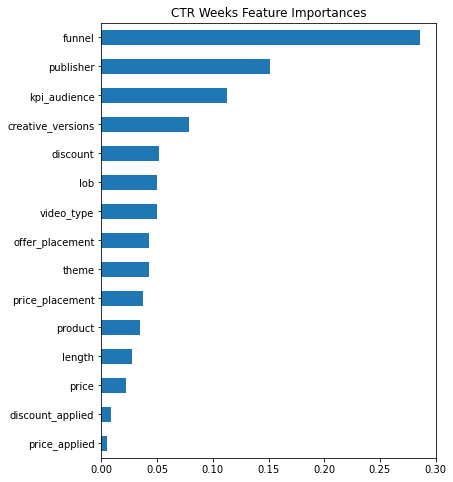

In [10]:
ctrs = [col for col in y.columns if col.startswith('CTR')]

rf = RandomForestRegressor(random_state=123)
rf.fit(X, y[ctrs])

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
)

importances = importances.sort_values()

plt.figure(figsize=(6, 8))
importances.plot(kind='barh')
plt.title(f'CTR Weeks Feature Importances')
plt.show()

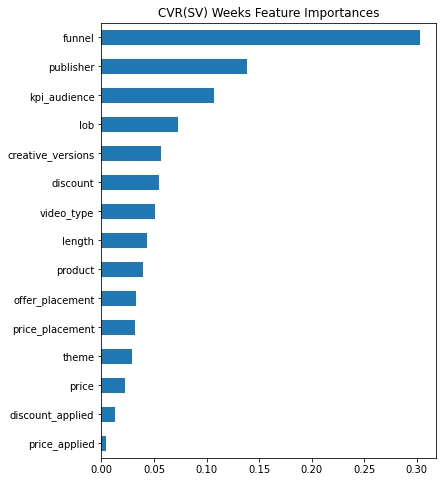

In [11]:
cvrsv = [col for col in y.columns if col.startswith('CVR(SV)')]

rf = RandomForestRegressor(random_state=123)
rf.fit(X, y[cvrsv])

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
)

importances = importances.sort_values()

plt.figure(figsize=(6, 8))
importances.plot(kind='barh')
plt.title(f'CVR(SV) Weeks Feature Importances')
plt.show()

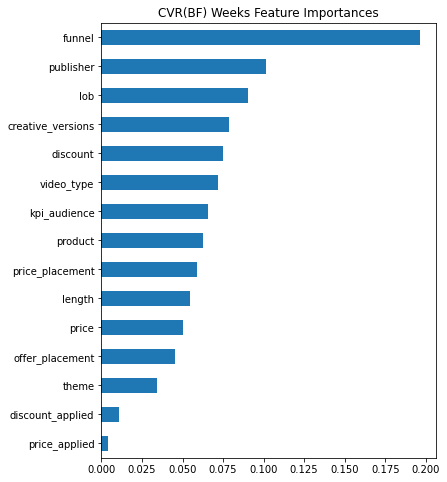

In [12]:
cvrbf = [col for col in y.columns if col.startswith('CVR(BF)')]

rf = RandomForestRegressor(random_state=123)
rf.fit(X, y[cvrbf])

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
)

importances = importances.sort_values()

plt.figure(figsize=(6, 8))
importances.plot(kind='barh')
plt.title(f'CVR(BF) Weeks Feature Importances')
plt.show()

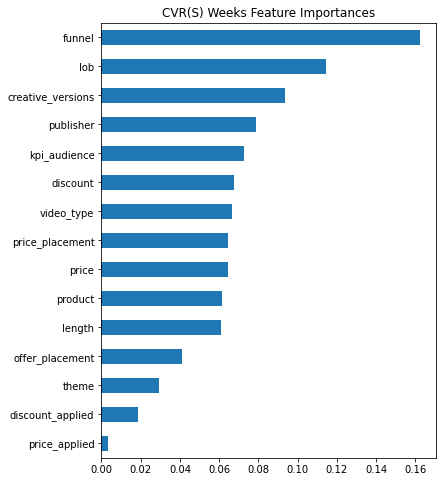

In [13]:
cvrs = [col for col in y.columns if col.startswith('Internet')]

rf = RandomForestRegressor(random_state=123)
rf.fit(X, y[cvrs])

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
)

importances = importances.sort_values()

plt.figure(figsize=(6, 8))
importances.plot(kind='barh')
plt.title(f'CVR(S) Weeks Feature Importances')
plt.show()